In [1]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
import datetime
from IPython import display
import tensorboard
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import class_weight
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.3.0


In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

col_names = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN']

Insurance_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-mld/ticdata2000.txt', sep = '\t', header=None, names = col_names)


Insurance_df = Insurance_df.reindex(
    np.random.permutation(Insurance_df.index))

Insurance_df

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
3599,6,2,3,3,2,2,4,1,3,6,1,2,2,3,4,3,4,3,3,1,0,4,1,2,3,2,3,2,1,3,6,6,2,2,6,3,2,3,4,2,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3705,8,1,2,4,2,2,2,2,5,7,1,2,2,4,4,5,3,2,8,1,0,0,0,0,7,0,2,0,0,0,9,3,5,2,2,7,0,2,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5053,8,1,3,3,2,2,6,0,2,9,0,0,0,3,6,5,3,2,4,0,0,5,0,0,3,2,3,2,0,0,9,7,2,0,2,7,0,5,0,4,...,6,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3421,36,1,3,3,8,0,7,0,2,6,0,3,3,2,4,3,3,4,3,0,2,0,3,2,3,0,2,5,0,2,7,3,0,6,7,2,3,4,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
1267,33,2,4,2,8,0,5,1,4,8,1,0,0,1,8,0,4,5,0,0,0,5,2,2,0,2,3,5,0,2,7,5,4,0,9,0,1,7,2,1,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,16,1,2,2,4,0,2,0,7,0,2,7,6,1,2,5,2,2,3,0,0,3,2,3,1,1,6,2,1,6,3,5,1,4,6,3,4,4,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2514,3,1,2,5,1,0,6,1,3,4,1,5,5,3,2,2,4,4,2,1,1,5,1,2,1,3,2,3,1,2,7,6,1,3,6,3,5,2,2,1,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3606,13,1,3,2,3,1,7,0,2,7,0,2,1,3,6,3,5,1,6,0,0,2,0,1,6,1,3,1,0,4,5,7,2,1,5,4,1,1,8,0,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5704,32,1,2,3,7,1,5,1,3,4,1,5,4,2,3,1,3,5,1,0,1,2,3,4,1,2,2,5,1,5,4,5,1,3,8,1,5,3,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [3]:
Insurance_df.query('CARAVAN > 0')

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
3145,33,1,3,3,8,0,5,0,4,7,2,0,0,3,6,0,4,5,2,0,2,0,4,3,2,0,2,5,0,4,5,7,2,0,5,4,2,2,3,3,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
661,8,1,3,3,2,1,5,1,3,7,1,2,0,2,7,5,3,2,3,1,0,4,2,1,4,3,2,2,1,1,8,7,0,2,5,4,1,2,4,3,...,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4251,39,1,4,3,9,0,6,1,3,7,1,2,1,1,8,0,2,7,1,0,0,1,5,3,1,1,1,7,1,6,3,6,1,2,9,0,1,7,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
957,33,1,2,4,8,0,2,2,5,7,0,2,0,6,3,0,2,7,0,0,0,3,4,3,0,2,0,7,0,9,0,7,2,0,9,0,6,3,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1623,32,1,2,4,7,2,4,3,2,6,1,3,3,5,2,1,4,4,3,2,1,2,2,2,1,2,3,3,2,5,4,6,0,3,6,3,3,2,4,2,...,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,8,1,3,2,2,0,7,2,0,7,2,0,0,6,3,2,7,0,2,0,0,7,0,0,2,3,4,0,0,0,9,7,2,0,7,2,0,6,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4896,39,2,3,3,9,1,5,0,3,7,1,2,1,2,6,1,4,5,2,1,0,3,2,3,1,3,2,4,1,3,6,6,2,2,6,3,2,4,3,1,...,6,0,0,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1
2494,24,1,2,3,5,1,3,1,5,4,2,4,4,2,3,1,3,6,1,0,1,3,3,3,1,1,3,3,3,7,2,6,0,3,8,1,5,4,1,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5222,9,1,2,2,3,1,2,4,4,8,1,1,1,6,3,2,7,1,2,0,0,7,1,1,2,5,2,1,0,6,3,8,1,1,7,2,1,5,3,1,...,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [4]:
Insurance_df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,...,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0,5822.0
mean,24.3,1.1,2.7,3.0,5.8,0.7,4.6,1.1,3.3,6.2,0.9,2.3,1.9,3.2,4.3,1.5,3.4,4.6,1.9,0.4,0.5,2.9,2.2,2.3,1.6,1.6,2.2,3.8,1.1,4.2,4.8,6.0,1.3,2.0,6.3,2.7,2.6,3.5,2.7,0.8,...,3.0,0.0,0.2,0.0,0.0,0.1,0.0,0.2,0.2,0.0,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.1
std,12.8,0.4,0.8,0.8,2.9,1.0,1.7,1.0,1.6,1.9,1.0,1.7,1.8,1.6,2.0,1.6,1.8,2.3,1.8,0.8,1.1,1.8,1.7,1.7,1.7,1.3,1.5,1.9,1.3,3.1,3.1,1.6,1.2,1.6,2.0,2.0,2.1,1.9,1.9,1.2,...,2.9,0.5,0.9,0.2,0.2,0.6,0.2,0.8,0.9,0.2,0.2,0.4,1.9,0.0,0.3,0.2,0.2,0.4,0.5,0.1,0.1,0.6,0.1,0.2,0.1,0.1,0.2,0.1,0.3,0.4,0.1,0.1,0.1,0.6,0.0,0.1,0.2,0.1,0.1,0.2
min,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10.0,1.0,2.0,2.0,3.0,0.0,4.0,0.0,2.0,5.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,5.0,0.0,1.0,5.0,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,30.0,1.0,3.0,3.0,7.0,0.0,5.0,1.0,3.0,6.0,1.0,2.0,2.0,3.0,4.0,1.0,3.0,5.0,2.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,4.0,5.0,6.0,1.0,2.0,7.0,2.0,2.0,4.0,3.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,35.0,1.0,3.0,3.0,8.0,1.0,6.0,2.0,4.0,7.0,1.0,3.0,3.0,4.0,6.0,2.0,4.0,6.0,3.0,1.0,1.0,4.0,3.0,3.0,2.0,2.0,3.0,5.0,2.0,7.0,7.0,7.0,2.0,3.0,8.0,4.0,4.0,5.0,4.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,41.0,10.0,5.0,6.0,10.0,9.0,9.0,5.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,5.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,8.0,7.0,7.0,9.0,5.0,6.0,6.0,6.0,9.0,6.0,3.0,7.0,8.0,3.0,6.0,1.0,6.0,5.0,2.0,5.0,1.0,7.0,4.0,8.0,3.0,3.0,4.0,6.0,2.0,8.0,1.0,1.0,2.0,7.0,1.0,2.0,3.0,2.0,2.0,1.0


In [5]:

Insurance_df.isnull().sum()


MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

In [6]:
Insurance_feat=Insurance_df.drop(columns='CARAVAN')
Insurance_feat

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
3599,6,2,3,3,2,2,4,1,3,6,1,2,2,3,4,3,4,3,3,1,0,4,1,2,3,2,3,2,1,3,6,6,2,2,6,3,2,3,4,2,...,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3705,8,1,2,4,2,2,2,2,5,7,1,2,2,4,4,5,3,2,8,1,0,0,0,0,7,0,2,0,0,0,9,3,5,2,2,7,0,2,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5053,8,1,3,3,2,2,6,0,2,9,0,0,0,3,6,5,3,2,4,0,0,5,0,0,3,2,3,2,0,0,9,7,2,0,2,7,0,5,0,4,...,0,6,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3421,36,1,3,3,8,0,7,0,2,6,0,3,3,2,4,3,3,4,3,0,2,0,3,2,3,0,2,5,0,2,7,3,0,6,7,2,3,4,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1267,33,2,4,2,8,0,5,1,4,8,1,0,0,1,8,0,4,5,0,0,0,5,2,2,0,2,3,5,0,2,7,5,4,0,9,0,1,7,2,1,...,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,16,1,2,2,4,0,2,0,7,0,2,7,6,1,2,5,2,2,3,0,0,3,2,3,1,1,6,2,1,6,3,5,1,4,6,3,4,4,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2514,3,1,2,5,1,0,6,1,3,4,1,5,5,3,2,2,4,4,2,1,1,5,1,2,1,3,2,3,1,2,7,6,1,3,6,3,5,2,2,1,...,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3606,13,1,3,2,3,1,7,0,2,7,0,2,1,3,6,3,5,1,6,0,0,2,0,1,6,1,3,1,0,4,5,7,2,1,5,4,1,1,8,0,...,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5704,32,1,2,3,7,1,5,1,3,4,1,5,4,2,3,1,3,5,1,0,1,2,3,4,1,2,2,5,1,5,4,5,1,3,8,1,5,3,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [7]:
Insurance_target=Insurance_df['CARAVAN']
Insurance_target

3599    0
3705    0
5053    0
3421    0
1267    0
       ..
1099    0
2514    0
3606    0
5704    0
2575    0
Name: CARAVAN, Length: 5822, dtype: int64

In [14]:
# train_x,valid_x,train_y,valid_y=train_test_split(Insurance_feat,Insurance_target,test_size=0.4,random_state=1)
# print('train x shape :', train_x.shape)
# print('train y shape :', train_y.shape)
# print('valid x shape :', valid_x.shape)
# print('valid y shape :', valid_y.shape)

train x shape : (3493, 85)
train y shape : (3493,)
valid x shape : (2329, 85)
valid y shape : (2329,)


In [8]:
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
smote=SMOTETomek(random_state=42)
x_over,y_over=smote.fit_sample(Insurance_feat.values,Insurance_target.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
df_feat_over=pd.DataFrame(data=x_over,columns=Insurance_feat.columns)
df_feat_over

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,6,2,3,3,2,2,4,1,3,6,1,2,2,3,4,3,4,3,3,1,0,4,1,2,3,2,3,2,1,3,6,6,2,2,6,3,2,3,4,2,...,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,1,2,4,2,2,2,2,5,7,1,2,2,4,4,5,3,2,8,1,0,0,0,0,7,0,2,0,0,0,9,3,5,2,2,7,0,2,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8,1,3,3,2,2,6,0,2,9,0,0,0,3,6,5,3,2,4,0,0,5,0,0,3,2,3,2,0,0,9,7,2,0,2,7,0,5,0,4,...,0,6,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,36,1,3,3,8,0,7,0,2,6,0,3,3,2,4,3,3,4,3,0,2,0,3,2,3,0,2,5,0,2,7,3,0,6,7,2,3,4,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,33,2,4,2,8,0,5,1,4,8,1,0,0,1,8,0,4,5,0,0,0,5,2,2,0,2,3,5,0,2,7,5,4,0,9,0,1,7,2,1,...,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,32,1,2,3,7,0,7,0,1,6,1,1,0,3,5,0,3,5,2,0,0,2,3,2,1,1,2,4,1,0,9,4,3,2,6,2,1,4,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10808,37,1,2,4,8,0,5,3,0,1,0,7,6,0,2,0,0,8,0,0,0,0,5,3,0,0,0,5,3,7,2,6,0,2,7,1,6,2,0,0,...,0,6,0,0,0,0,0,0,0,3,0,0,0,4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0
10809,11,1,3,3,3,0,4,1,3,7,0,2,1,3,5,0,7,1,2,0,0,6,0,1,1,2,5,2,0,7,1,7,1,0,6,2,1,5,2,0,...,0,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10810,23,1,2,3,5,1,4,1,3,3,2,4,4,2,3,1,4,2,1,0,0,3,1,3,1,2,3,2,1,7,1,6,0,3,8,1,4,2,2,0,...,0,5,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_feat_over.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,...,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0,10812.0
mean,22.4,1.1,2.6,2.9,5.3,0.6,4.6,0.9,3.0,6.3,0.7,2.0,1.6,3.1,4.3,1.6,3.3,4.0,2.0,0.3,0.3,2.9,1.9,2.0,1.7,1.6,2.1,3.5,0.8,3.6,5.1,6.1,1.2,1.6,5.9,2.8,2.1,3.4,2.8,0.8,...,0.0,3.8,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.2,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.1,0.4,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0
std,13.4,0.3,0.7,0.7,3.0,0.9,1.6,0.9,1.5,1.7,0.8,1.5,1.6,1.5,1.9,1.6,1.6,2.3,1.8,0.7,0.9,1.8,1.6,1.6,1.7,1.2,1.4,1.9,1.1,3.0,3.0,1.4,1.1,1.4,2.0,1.9,1.9,1.8,1.7,1.1,...,0.4,2.8,0.4,0.8,0.2,0.2,0.5,0.2,0.6,0.8,0.2,0.2,0.4,1.8,0.0,0.3,0.1,0.2,0.4,0.5,0.1,0.1,0.5,0.1,0.2,0.0,0.1,0.2,0.1,0.2,0.3,0.1,0.1,0.1,0.5,0.0,0.1,0.2,0.1,0.1
min,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8.0,1.0,2.0,2.0,2.0,0.0,4.0,0.0,2.0,5.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,3.0,5.0,0.0,0.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,26.0,1.0,3.0,3.0,6.0,0.0,4.0,1.0,3.0,6.0,1.0,2.0,1.0,3.0,4.0,1.0,3.0,4.0,2.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0,0.0,3.0,6.0,6.0,1.0,2.0,6.0,3.0,2.0,3.0,3.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,34.0,1.0,3.0,3.0,8.0,1.0,5.0,2.0,4.0,7.0,1.0,3.0,2.0,4.0,6.0,2.0,4.0,6.0,3.0,1.0,0.0,4.0,3.0,3.0,3.0,2.0,3.0,5.0,1.0,6.0,8.0,7.0,2.0,2.0,7.0,4.0,3.0,4.0,4.0,1.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,41.0,10.0,5.0,6.0,10.0,9.0,9.0,5.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,5.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,4.0,8.0,7.0,7.0,9.0,5.0,6.0,6.0,6.0,9.0,6.0,3.0,7.0,8.0,3.0,6.0,1.0,6.0,5.0,2.0,5.0,1.0,7.0,4.0,8.0,3.0,3.0,4.0,6.0,2.0,8.0,1.0,1.0,2.0,7.0,1.0,2.0,3.0,2.0,2.0


In [14]:
df_target_over=y_over
df_target_over

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
train_x,valid_x,train_y,valid_y=train_test_split(df_feat_over,df_target_over,test_size=0.4,random_state=1)
print('train x shape :', train_x.shape)
print('train y shape :', train_y.shape)
print('valid x shape :', valid_x.shape)
print('valid y shape :', valid_y.shape)

train x shape : (6487, 85)
train y shape : (6487,)
valid x shape : (4325, 85)
valid y shape : (4325,)


In [27]:
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(train_y),train_y)
                                                

In [28]:
# class_weights = dict(enumerate(class_weights))

In [16]:
scaler = StandardScaler().fit(train_x.values)
scaledf = scaler.transform(train_x.values)
train_x = pd.DataFrame(scaledf, index=train_x.index, columns=train_x.columns)


scaler2 = StandardScaler().fit(valid_x.values)
vscaled = scaler2.transform(valid_x.values)
valid_x = pd.DataFrame(vscaled, index=valid_x.index, columns=valid_x.columns)


In [17]:
print('Training sample summary')
display.display(train_x.describe())
print('Valid sample summary')
display.display(valid_x.describe())

Training sample summary


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,...,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0,6487.0
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,...,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.6,-0.2,-2.3,-2.6,-1.4,-0.7,-2.9,-1.0,-2.0,-3.8,-0.9,-1.3,-1.0,-2.0,-2.3,-1.0,-2.0,-1.8,-1.1,-0.5,-0.4,-1.6,-1.2,-1.3,-1.0,-1.3,-1.5,-1.8,-0.7,-1.2,-1.7,-4.4,-1.1,-1.1,-3.0,-1.5,-1.1,-1.9,-1.6,-0.7,...,-0.1,-1.4,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.1,-1.2,-0.0,-0.1,-0.1,-0.1,-0.2,-0.8,-0.1,-0.1,-1.2,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.0,-1.1,-0.0,-0.1,-0.1,-0.1,-0.1
25%,-1.1,-0.2,-0.9,-1.2,-1.1,-0.7,-0.4,-1.0,-0.6,-0.8,-0.9,-0.6,-1.0,-0.7,-0.7,-1.0,-0.8,-0.9,-0.6,-0.5,-0.4,-0.5,-0.6,-0.6,-1.0,-0.5,-0.8,-0.8,-0.7,-0.9,-0.7,-0.8,-1.1,-1.1,-0.4,-0.4,-0.6,-0.8,-0.5,-0.7,...,-0.1,-1.4,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.1,-1.2,-0.0,-0.1,-0.1,-0.1,-0.2,-0.8,-0.1,-0.1,-1.2,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.0,-1.1,-0.0,-0.1,-0.1,-0.1,-0.1
50%,0.3,-0.2,0.5,0.1,0.2,-0.7,-0.4,0.1,0.0,0.4,0.3,0.0,-0.3,-0.1,-0.2,-0.4,-0.2,-0.0,-0.0,-0.5,-0.4,0.1,0.1,-0.0,-0.4,0.4,-0.1,-0.2,-0.7,-0.2,0.3,-0.1,-0.2,0.3,0.1,0.1,-0.1,-0.2,0.1,-0.7,...,-0.1,0.8,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.1,-0.0,-0.0,-0.1,-0.1,-0.1,-0.2,-0.8,-0.1,-0.1,0.6,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.0,0.8,-0.0,-0.1,-0.1,-0.1,-0.1
75%,0.9,-0.2,0.5,0.1,0.9,0.4,0.3,1.1,0.7,0.4,0.3,0.7,0.3,0.6,0.9,0.2,0.4,0.9,0.5,1.0,-0.4,0.6,0.7,0.6,0.8,0.4,0.7,0.8,0.2,0.8,1.0,0.7,0.7,0.3,0.6,0.6,0.5,0.4,0.6,0.2,...,-0.1,0.8,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.1,1.1,-0.0,-0.1,-0.1,-0.1,-0.2,1.2,-0.1,-0.1,0.6,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.0,-0.1,-0.0,0.8,-0.0,-0.1,-0.1,-0.1,-0.1
max,1.4,26.5,3.2,4.2,1.6,9.6,2.8,4.4,4.0,1.6,7.5,4.6,4.7,3.9,2.5,4.5,3.5,2.2,3.9,6.9,10.1,3.4,4.4,4.5,4.3,6.1,5.0,2.9,5.5,1.8,1.3,2.1,5.1,5.1,1.6,3.2,3.7,3.2,3.5,7.4,...,10.0,1.5,14.1,9.1,43.5,21.7,12.4,43.9,7.5,8.6,35.8,15.7,21.1,3.3,80.5,17.2,8.1,31.3,9.0,3.3,47.5,9.2,11.6,35.3,12.5,56.9,31.5,23.1,36.9,9.6,12.0,22.3,16.8,34.3,8.3,80.5,25.8,16.6,28.9,20.8


Valid sample summary


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,...,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.6,-0.3,-2.2,-2.5,-1.5,-0.7,-2.9,-1.0,-2.0,-3.7,-0.9,-1.3,-1.0,-2.1,-2.3,-1.0,-2.0,-1.8,-1.1,-0.5,-0.4,-1.6,-1.2,-1.3,-1.0,-1.3,-1.5,-1.8,-0.7,-1.2,-1.7,-4.4,-1.1,-1.1,-3.0,-1.4,-1.1,-1.9,-1.6,-0.7,...,-0.1,-1.4,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.1,-1.2,-0.0,-0.1,-0.1,-0.1,-0.2,-0.8,-0.1,-0.1,-1.2,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.0,-1.1,-0.0,-0.1,-0.1,-0.1,-0.1
25%,-1.0,-0.3,-0.9,-1.2,-1.1,-0.7,-0.4,-1.0,-0.7,-0.8,-0.9,-0.6,-1.0,-0.7,-0.7,-1.0,-0.8,-0.9,-0.5,-0.5,-0.4,-0.5,-0.6,-0.6,-1.0,-0.5,-0.8,-0.8,-0.7,-0.9,-0.7,-0.8,-1.1,-1.1,-0.5,-0.9,-0.6,-0.8,-0.5,-0.7,...,-0.1,-1.4,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.1,-1.2,-0.0,-0.1,-0.1,-0.1,-0.2,-0.8,-0.1,-0.1,-1.2,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.0,-1.1,-0.0,-0.1,-0.1,-0.1,-0.1
50%,0.3,-0.3,0.5,0.1,0.2,-0.7,-0.4,0.1,-0.0,-0.2,0.3,0.0,-0.4,-0.1,-0.1,-0.4,-0.2,-0.0,0.0,-0.5,-0.4,0.0,0.0,-0.0,-0.4,-0.5,-0.0,-0.3,-0.7,-0.2,0.3,-0.1,-0.2,0.3,0.0,-0.4,-0.1,-0.2,0.1,-0.7,...,-0.1,0.8,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.1,-0.0,-0.0,-0.1,-0.1,-0.1,-0.2,-0.8,-0.1,-0.1,0.6,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.0,0.8,-0.0,-0.1,-0.1,-0.1,-0.1
75%,0.9,-0.3,0.5,0.1,0.9,0.5,0.3,0.1,0.6,0.4,0.3,0.7,0.3,0.6,0.9,0.3,0.4,0.8,0.6,0.9,-0.4,0.6,0.6,0.6,0.2,0.4,0.7,0.8,0.2,0.8,1.0,0.7,0.7,0.3,0.5,0.6,0.5,0.3,0.7,0.2,...,-0.1,0.8,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.1,1.1,-0.0,-0.1,-0.1,-0.1,-0.2,1.2,-0.1,-0.1,0.6,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,-0.1,-0.0,0.8,-0.0,-0.1,-0.1,-0.1,-0.1
max,1.4,19.0,3.2,4.2,1.6,9.6,2.9,4.4,3.9,1.6,6.2,4.5,4.6,3.9,2.5,4.6,3.4,2.2,3.8,6.8,9.0,3.4,4.3,4.4,4.3,6.1,5.0,2.9,7.3,1.8,1.3,2.1,4.2,5.1,1.5,3.2,3.6,3.1,3.6,6.8,...,10.9,1.5,17.6,8.7,46.5,30.7,12.0,29.0,9.6,10.7,29.4,16.7,18.4,2.8,62.4,18.5,8.2,40.7,11.4,3.3,10.9,10.0,9.7,36.5,38.3,58.8,31.2,20.4,46.8,10.1,22.3,16.4,17.0,36.5,12.1,46.5,13.7,10.8,16.4,10.0


In [83]:
print('Training target sample summary')
display.display(train_y.describe())
print('Validation target sample summary')
display.display(valid_y.describe())

Training target sample summary


AttributeError: ignored

In [84]:
train_y

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
baseline_model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_x.shape[1],)),
    # keras.layers.Dense(32,activation=tf.nn.relu,),
    
    
    keras.layers.Dense(1)

  ])

baseline_model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
baseline_model.summary()

# l1_model = keras.Sequential([
#     keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
#                        input_shape=(train_x.shape[1],)),
#     keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
#     keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
#     keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
#     keras.layers.Dense(1)
#   ])

# l1_model.compile(loss='mse',
#                 optimizer='rmsprop',
#                 metrics=['accuracy'])
# l1_model.summary()

# l2_model = keras.Sequential([
#     keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
#                        input_shape=(train_x.shape[1],)),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
#     keras.layers.Dropout(0.25),
#     keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
#     keras.layers.Dense(1)
#   ])


# l2_model.compile(loss='mse',
#                 optimizer='adam',
#                 metrics=['accuracy'])
# l2_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5504      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [19]:
EPOCHS = 100
base_1_layer = baseline_model.fit(train_x, train_y, epochs=EPOCHS,
                    validation_data= (valid_x, valid_y), verbose=1,shuffle=True,batch_size=100)
                    # callbacks=[PrintDot(), tensorboard_callback])

Epoch 1/100
65/65 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.6764 - val_loss: 0.2107 - val_accuracy: 0.7963
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.8369 - val_loss: 0.1506 - val_accuracy: 0.8631
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.8889 - val_loss: 0.1236 - val_accuracy: 0.8927
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9118 - val_loss: 0.1136 - val_accuracy: 0.9080
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9300 - val_loss: 0.1083 - val_accuracy: 0.9191
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9407 - val_loss: 0.0984 - val_accuracy: 0.9188
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9434 - val_loss: 0.1002 - val_accuracy: 0.9253
Epoch 8/100
6

In [20]:
baseline_model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_x.shape[1],)),
    keras.layers.Dense(32,activation=tf.nn.selu,),
    
    
    keras.layers.Dense(1,activation=tf.nn.sigmoid)

  ])

baseline_model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='sgd',
                metrics=['accuracy'])
baseline_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                5504      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 7,617
Trainable params: 7,617
Non-trainable params: 0
_________________________________________________________________


In [21]:
base_2_layer = baseline_model2.fit(train_x, train_y, epochs=EPOCHS,
                    validation_data= (valid_x, valid_y), verbose=1,shuffle=True,batch_size=100)

Epoch 1/100
65/65 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5772 - val_loss: 0.6152 - val_accuracy: 0.6606
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7093 - val_loss: 0.5367 - val_accuracy: 0.7438
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7624 - val_loss: 0.4831 - val_accuracy: 0.7901
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7994 - val_loss: 0.4411 - val_accuracy: 0.8146
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8232 - val_loss: 0.4060 - val_accuracy: 0.8351
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8437 - val_loss: 0.3761 - val_accuracy: 0.8518
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8593 - val_loss: 0.3505 - val_accuracy: 0.8629
Epoch 8/100
6

In [22]:
l1_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(train_x.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.02), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.02), activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
  ])

l1_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='sgd',
                metrics=['accuracy'])
l1_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                2752      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [23]:
base_l1 = baseline_model2.fit(train_x, train_y, epochs=EPOCHS,
                    validation_data= (valid_x, valid_y), verbose=1,shuffle=True,batch_size=100)

Epoch 1/100
65/65 [==============================] - 0s 4ms/step - loss: 0.0713 - accuracy: 0.9764 - val_loss: 0.1403 - val_accuracy: 0.9538
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9772 - val_loss: 0.1407 - val_accuracy: 0.9521
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9772 - val_loss: 0.1405 - val_accuracy: 0.9521
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9776 - val_loss: 0.1406 - val_accuracy: 0.9535
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.1412 - val_accuracy: 0.9542
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9781 - val_loss: 0.1411 - val_accuracy: 0.9540
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9776 - val_loss: 0.1409 - val_accuracy: 0.9531
Epoch 8/100
6

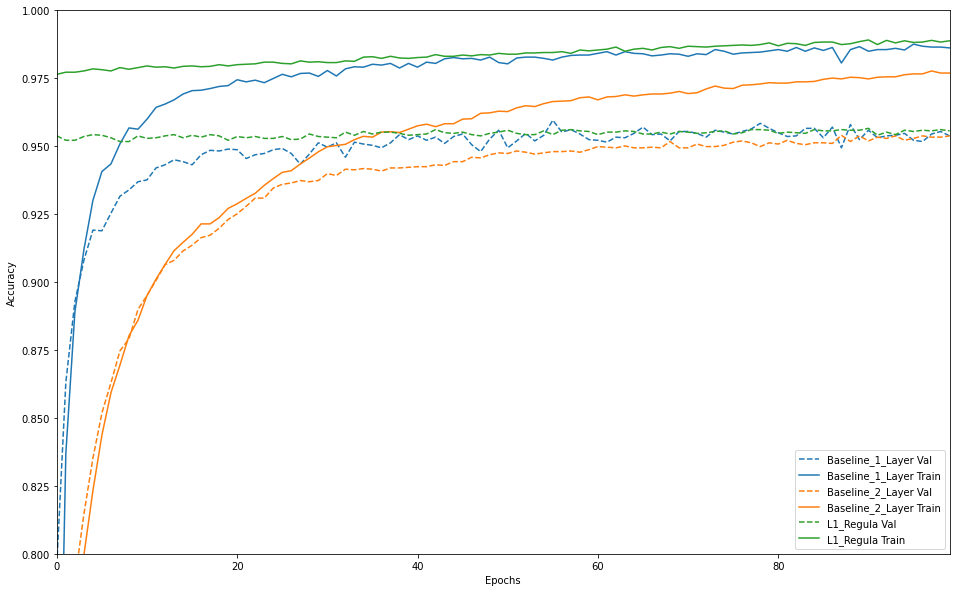

In [24]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0.8,1])

plot_history([('baseline_1_layer', base_1_layer),('baseline_2_layer', base_2_layer),('L1_Regula', base_l1)])
